# PCA task on Iris dataset
This task explores and analyses Iris: data exploration, scaling, PCA (n_components=3), biplot, clustering (k-means & hierarchical), and correlation comparison before and after PCA.

# Load Data

In [42]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Explore features and statistical properties

In [43]:
df.describe()

# Correlation matrix
corr_orig = df.iloc[:, :4].corr()
corr_orig

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
Id,1.000000,0.716676,-0.397729,0.882747
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000


## 3. Scatter matrix to show correlations

Text(0.5, 0.98, 'Pairwise scatter matrix of Iris features')

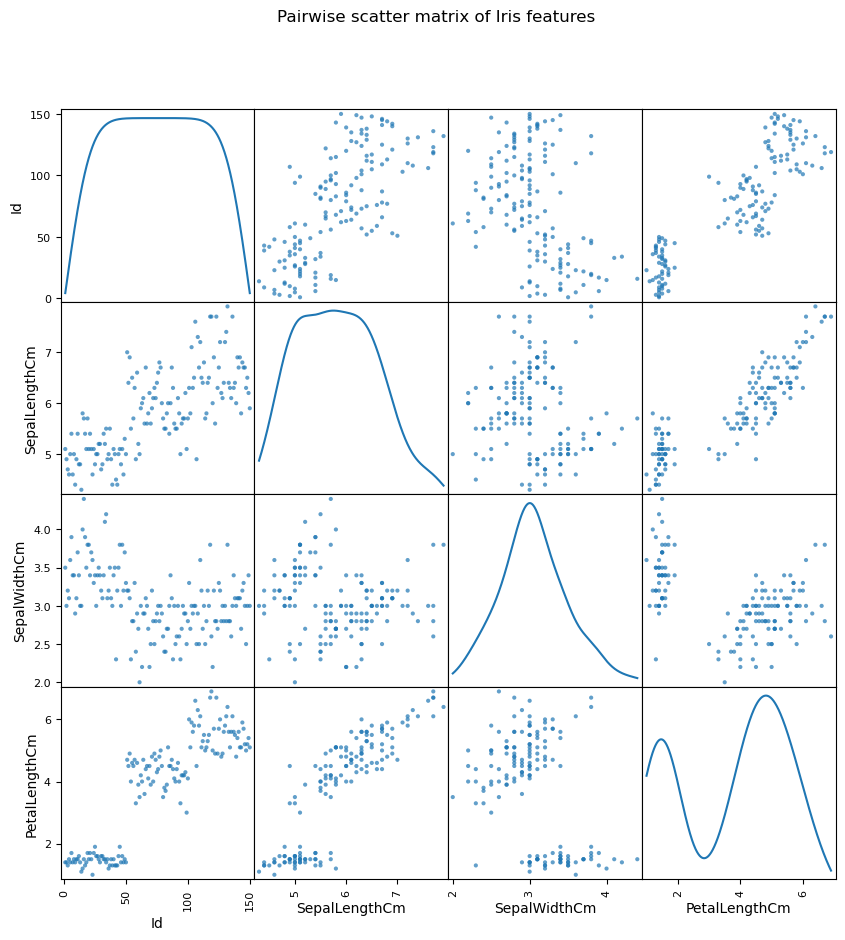

In [44]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(df.iloc[:, :4], diagonal='kde', alpha=0.7, figsize=(10,10))
plt.suptitle('Pairwise scatter matrix of Iris features')

## 4. Scale data and apply PCA (n_components=3)
Standardise features and apply PCA.

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :4])
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [0.70308855 0.22873259 0.05644497]


## 5. Biplot for PC1 vs PC2

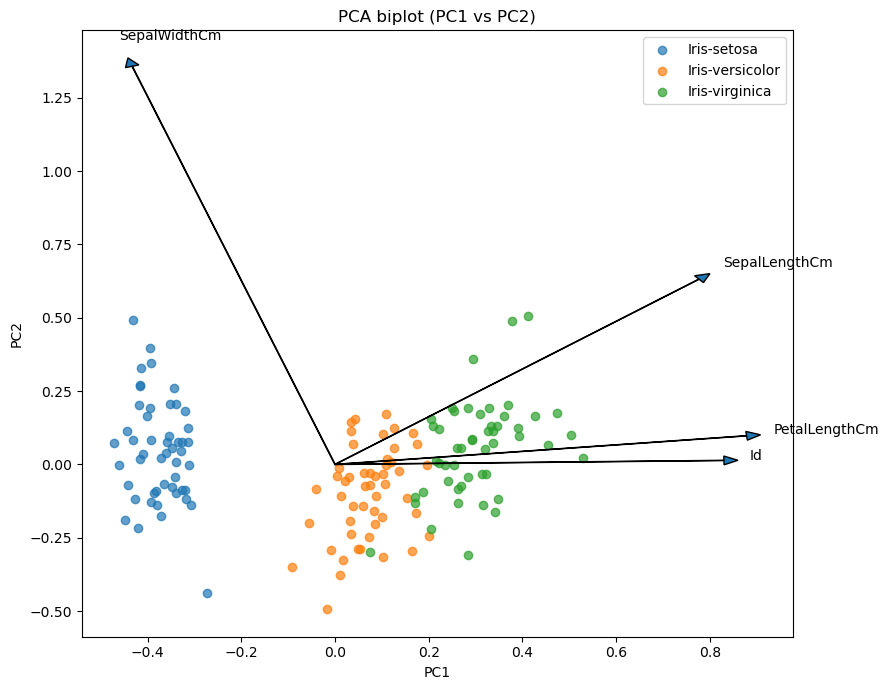

In [46]:
import matplotlib.pyplot as plt
coeff = pca.components_.T
xs = X_pca[:,0]
ys = X_pca[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

fig, ax = plt.subplots(figsize=(9,7))
for s in df['Species'].unique():
    mask = (df['Species']==s)
    ax.scatter(xs[mask]*scalex, ys[mask]*scaley, label=str(s), alpha=0.7)
for i, f in enumerate(df.columns[:4]):  # first 4 columns are features
    ax.arrow(0, 0, coeff[i, 0]*1.5, coeff[i, 1]*1.5, head_width=0.03, head_length=0.03)
    ax.text(coeff[i, 0]*1.6, coeff[i, 1]*1.6, f)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
ax.set_title('PCA biplot (PC1 vs PC2)')
plt.tight_layout()

## 6. Clustering: K-Means and Hierarchical
Both clustering methods and compare with species labels.

In [47]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
Z = linkage(X_scaled, method='ward')
h_labels = fcluster(Z, 3, criterion='maxclust') - 1
import pandas as pd
print('KMeans contingency:\n', pd.crosstab(kmeans_labels, df['Species']))
print('\nHierarchical contingency:\n', pd.crosstab(h_labels, df['Species']))

KMeans contingency:
 Species  Iris-setosa  Iris-versicolor  Iris-virginica
row_0                                                
0                  0               10              43
1                  1               40               7
2                 49                0               0

Hierarchical contingency:
 Species  Iris-setosa  Iris-versicolor  Iris-virginica
row_0                                                
0                 49                0               0
1                  0                0              44
2                  1               50               6


## 7. Correlation after PCA
Compute correlation matrix of the principal components and compare to the original.

In [48]:
import pandas as pd
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
print('Correlation - original features:\n', corr_orig)
print('\nCorrelation - PCA components:\n', pca_df.corr())

Correlation - original features:
                      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
Id             1.000000       0.716676     -0.397729       0.882747
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000

Correlation - PCA components:
               PC1           PC2           PC3
PC1  1.000000e+00  3.792239e-18  1.187059e-15
PC2  3.792239e-18  1.000000e+00  3.337874e-16
PC3  1.187059e-15  3.337874e-16  1.000000e+00


Both K-Means and Hierarchical clustering can separate the three species reasonably well.
Iris setosa is usually perfectly separated because its feature values (petal and sepal lengths) are very distinct.
Iris versicolor and Iris virginica tend to overlap, so clusters may mix these two species slightly.
Conclusion:
Clustering techniques generally identify the three species, with perfect separation for Setosa and partial overlap between Versicolor and Virginica, reflecting the natural similarity in their measurements.

8.After applying PCA, recreate the correlation plot with the transformed data. Compare it to the original, noting any reduction in redundancies.
Original features correlation: SepalLengthCm and PetalLengthCm are strongly correlated (0.872), SepalWidthCm negatively correlated with lengths (-0.42).
PCA components correlation: All off-diagonal correlations are effectively zero (≈10⁻¹⁵–10⁻¹⁸), and diagonal correlations are 1.

Comparison and Interpretation:
PCA removed the strong correlations between the original features, producing independent components. This reduces overlap in the data and makes it easier to analyze and visualize.